In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()

In [ ]:
import nltk

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df=pd.read_csv("Train.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.text[5]

### we have tags, so need to remove it
### and emogis like :) needs to be removed

"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?<br /><br />There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery."

In [ ]:
df.label.value_counts()

### no imbalance

0    20019
1    19981
Name: label, dtype: int64

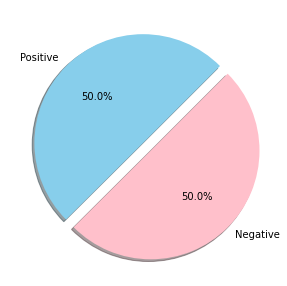

In [ ]:
###
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'pink']
pos=df[df['label']==1]
neg=df[df['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [ ]:
import re

In [ ]:
line1=re.sub('<[^>]*>','',df.text[5])  ### tags removed
line1

"A terrible movie as everyone has said. What made me laugh was the cameo appearance by Scott McNealy, giving an award to one of the murdered programmers in front of a wall of SUN logos. McNealy is the CEO of SUN Microsystem, a company that practically defines itself by its hatred of Microsoft. They have been instrumental in filing antitrust complaints against Microsoft. So, were they silly enough to think this bad movie would add fuel to that fire?There's no public record I see of SUN's involvement, but clearly the makers of this movie know Scott McNealy. An interesting mystery."

In [ ]:
emojis_=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',df.text[122]) ### finds emojis
emojis_

[]

In [ ]:
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   

In [ ]:
df.text=df.text.apply(preprocessor)

In [ ]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in tokenizer(text)]

In [ ]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

In [ ]:
positive_data=df.text.loc[df.label==1]
negetive_data=df.text.loc[df.label==0]


In [ ]:
negetive_data[:10]

0     i grew up b 1965 watching and loving the thund...
1     when i put this movie in my dvd player and sat...
2     why do people who do not know what a particula...
3     even though i have great interest in biblical ...
5     a terrible movie as everyone has said what mad...
7     i caught this film on azn on cable it sounded ...
11    if you haven t seen the gong show tv series th...
13    greg davis and bryan daly take some crazed sta...
14    a half hearted attempt to bring elvis presley ...
17    the main problem with power is that it feature...
Name: text, dtype: object

In [ ]:
from wordcloud import WordCloud
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)  ### list of all words in sentences
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')   ### removing if words is movie of film
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    

Postive Daata Word CLoud is


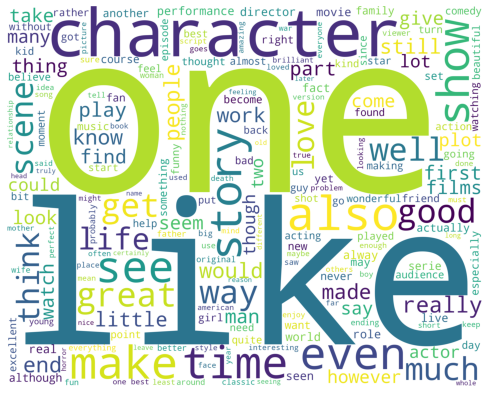


Ngetive Data Word CLoud is


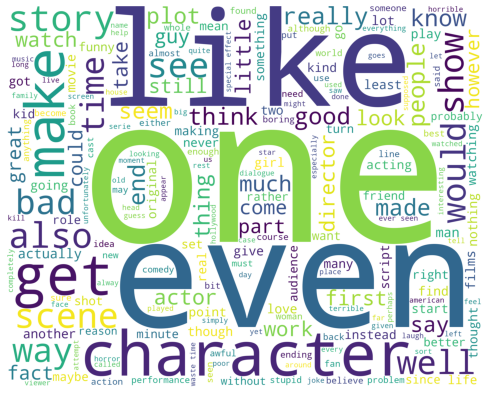

In [ ]:
print("Postive Daata Word CLoud is")
wordcloud_draw(positive_data)
print()
print("Ngetive Data Word CLoud is")
wordcloud_draw(negetive_data)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
y=df.label.values
x=tfidf.fit_transform(df.text)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3,shuffle=False)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [ ]:
clf.score(X_test, y_test)

0.8545833333333334

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.6min finished


In [ ]:
clf.score(X_test, y_test)

0.894

In [ ]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6011
           1       0.89      0.90      0.89      5989

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

